# How to Use this-

First make a copy of this notebook- by clicking File, "Save a Copy in File"

Then, from Kaggle download dataset and the upload in your drive.

For support watch- Connect Google Colab and Drive video [here](https://www.loom.com/share/6a6df1e60d254da8834ab7e851d3b3c8?sid=98db9718-842b-4965-aaea-28e3ddba7bc3).

> For each code, you need to write comment and also interpretation

 🧪 **Bonus (Extra Marks): Perform a T-test or Calculate P-values**  
  - Choose a feature and test whether its relationship with the target variable is statistically significant  
  - Use `scipy.stats.ttest_ind()` or similar methods to support your claims  

Dataset -
https://www.kaggle.com/datasets/jillanisofttech/brain-stroke-dataset


# Attribute Information

1) gender: "Male", "Female" or "Other"

2) age: age of the patient

3) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

4) heart disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease 5) Ever-married: "No" or "Yes"

6) work type: "children", "Govtjov", "Never worked", "Private" or "Self-employed"

7) Residencetype: "Rural" or "Urban"

8) avg glucose level: average glucose level in blood

9) BMI: body mass index

10) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"

11) stroke: 1 if the patient had a **stroke** or 0 if not


# Objective -
1) to observe if there's any relation between stroke and all given attributes in the data
2) validate the observed relations with hypothesis testing
3) explain the findings with scientific reasons



In [112]:
# Basic Library
import pandas as pd # for data manipulation
import numpy as np # for calculation(math)
import matplotlib.pyplot as plt # for graphs
import seaborn as sns #also for graphs



In [106]:
df = pd.read_csv("/brain_stroke.csv") # reads csv file into DataFrame
df   #prints the dataframe

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [107]:
df.head() # returns the first 5 rows of df, 5 by default

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [108]:
df.tail(n=7) #returns last 7 rows of df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4974,Male,58.0,0,0,Yes,Govt_job,Urban,84.94,30.2,never smoked,0
4975,Male,31.0,0,0,No,Private,Urban,215.07,32.7,smokes,0
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0
4980,Female,80.0,1,0,Yes,Private,Urban,83.75,29.1,never smoked,0


In [109]:
print(df[['age', 'stroke']].corr()) #gives correlation coeff between age and stroke

             age    stroke
age     1.000000  0.246478
stroke  0.246478  1.000000


In [110]:
df.shape  #gives the shape of df

(4981, 11)

Column = 11
Row  = 4981
datapoint - 11*4981

In [114]:
df.info() #prints concise summary of df, gives datatype of columns and also memory usage


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [ ]:
4981*11

54791

# Data Snapshot
* Data size- 11 columns, 4981 records
* data points - 54791
* No of categorical varible -5, float 3, whole no 3
* memory size 428KB
* no missing values

# Write as you like

In [ ]:
df.isnull().values.sum() #df.isnull detects if the values are NA and maps it to True values, .values.sum() sums up the values and returns NumPy integer type

np.int64(0)

In [ ]:
print(df.isnull().values.sum()) #prints the sum

0


In [12]:
# # Inspect missing values in the dataset
# print(df.isnull().values.sum())

# # # Replace the ' 's with NaN
# df = df.replace(" ",np.NaN)

# df.fillna(df.mean(), inplace= True) # center theorum imputation

# # Count the number of NaNs in the dataset to verify
# print(df.isnull().values.sum())

# EDA

- Distribution - histogram, bar graph, box plot
- Trend - line chart
- Correlation - 2- scatterplot, heatmap

In [ ]:
df.describe() #prints descriptive statistics of df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


* Maximum age is 82, minimum age is 0.08, mean is 43.42, and median is 45.
* Average BMI is 28.5, Average glucose level is 105.94.

In [140]:
df2 = df.copy() #copies df data to new dataframe df2

In [141]:
stroke = df['stroke'] == 1   #stroke variable stores boolean values as result of a condition applied to column df['stroke']


df_stroke = df.loc[stroke]   #access the group of rows and columns of df which has True in stroke variable
df_stroke

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4815,Male,79.0,0,0,Yes,Private,Rural,114.77,27.2,formerly smoked,1
4816,Male,74.0,0,0,Yes,Private,Urban,167.13,28.7,Unknown,1
4817,Female,76.0,1,1,Yes,Self-employed,Urban,199.86,31.7,smokes,1
4818,Male,74.0,0,0,Yes,Self-employed,Rural,60.98,28.1,never smoked,1


In [142]:
# Select "work_type" variable and print it
print(df2['work_type'])  

0             Private
1             Private
2             Private
3       Self-employed
4             Private
            ...      
4976          Private
4977          Private
4978         Govt_job
4979          Private
4980          Private
Name: work_type, Length: 4981, dtype: object


Text(0.5, 1.0, 'Histogram of Age')

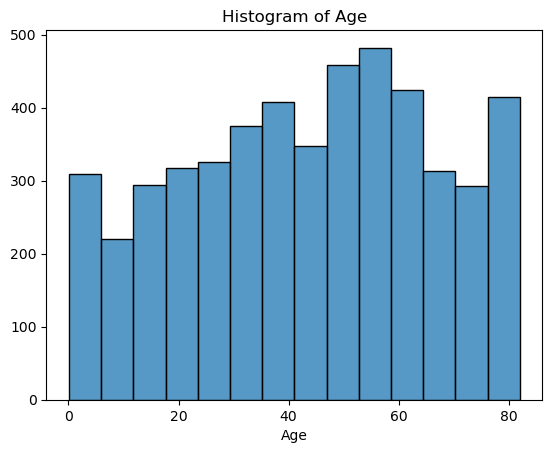

In [115]:
# sns.histplot(data=df, x="age")

""" Plot Histogram for Age"""
sns.histplot(data=df2,x='age',bins=14)  #plots histogram for age in dataframe df2 with bins 12
plt.xlabel('Age')   #x-label
plt.ylabel('')      #y-label
plt.title('Histogram of Age') #title for the histogram


* The distribution of age is multimodal not a normal distribution.

Text(0, 0.5, '')

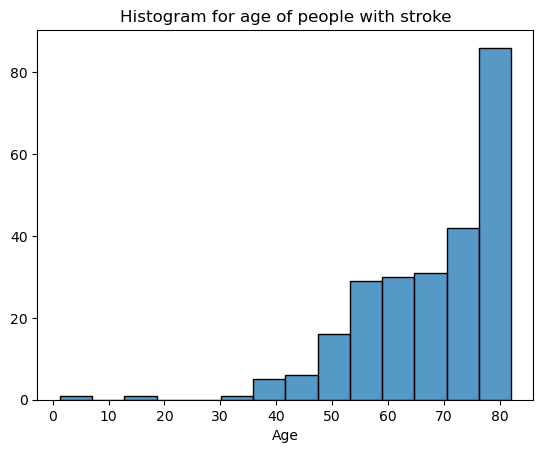

In [116]:
sns.histplot(data=df_stroke,x='age') #plots histogram for age in dataframe df_stroke 

plt.title('Histogram for age of people with stroke')
plt.xlabel('Age')
plt.ylabel('')


* The histogram for age of people with stroke is right-skewed. There are more older people with stroke than young ones.

<Axes: xlabel='gender', ylabel='Count'>

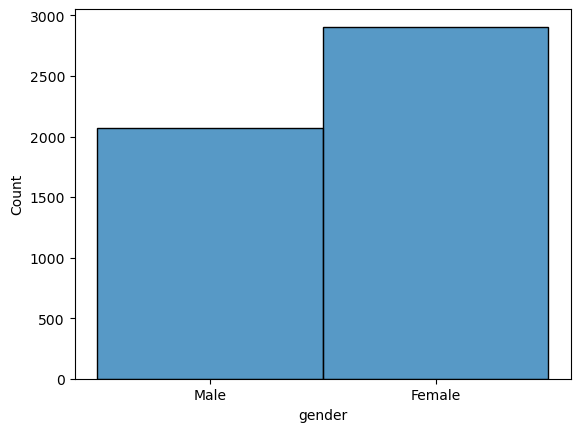

In [67]:
sns.histplot(data=df, x="gender")

plt.title('Histogram for age of people with stroke')
plt.xlabel('Age')
plt.ylabel('')


In [ ]:
f_table = df['gender'].value_counts().reset_index()
f_table.columns =['gender', 'count']
print(f_table)

    gendr  count
0  Female   2907
1    Male   2074


Text(0.5, 1.0, 'Stroke by gender')

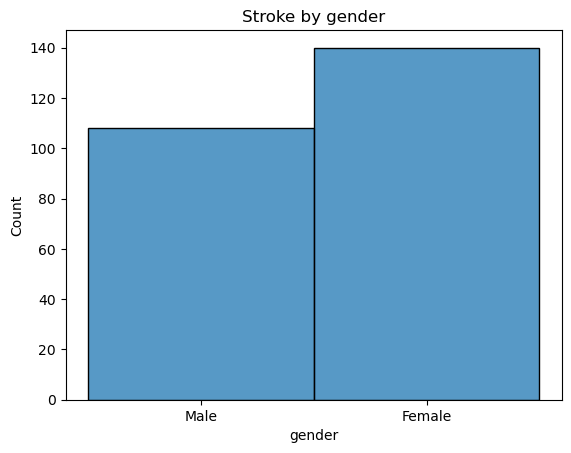

In [68]:
sns.histplot(data=df_stroke,x='gender')
plt.title('Stroke by gender')

* Female count is more than male count in both total population and the population with stroke.

In [132]:
age_array = df_stroke['age'].to_numpy()  #converts the column Age into numpy array
Q_n = 0
for i in range(0,5):
    print(Q_n,'th percentile is',np.percentile(age_array,Q_n))
    Q_n += 25


0 th percentile is 1.32
25 th percentile is 59.0
50 th percentile is 71.0
75 th percentile is 78.0
100 th percentile is 82.0


Text(0.5, 1.0, 'Box plot of Age')

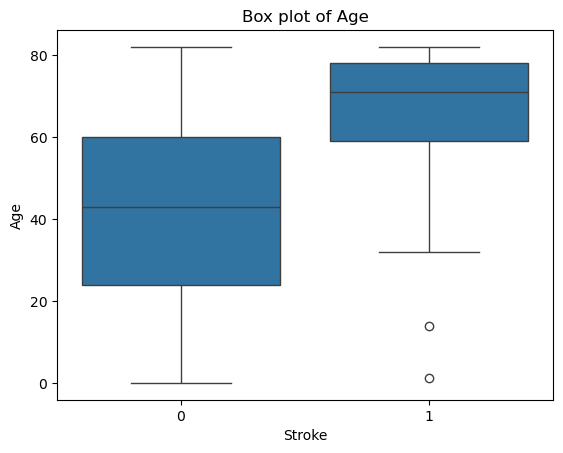

In [133]:
""" Plot Box Plot for Age"""
sns.boxplot(data=df2,y='age',x='stroke') #draws box plot of age for dataframe df2 with stroke as x-axis
plt.ylabel('Age')
plt.xlabel('Stroke')
plt.title('Box plot of Age')

* In the box-plot, people with stroke has median age of 71.
* 50% percent of people with stroke are below the age of 71.
* 25% percent of people with stroke are above the age of 78.
* There are two outliers in the boxplot of people with stroke.
* But the people with no stroke has median age of about 42.

<Axes: ylabel='age'>

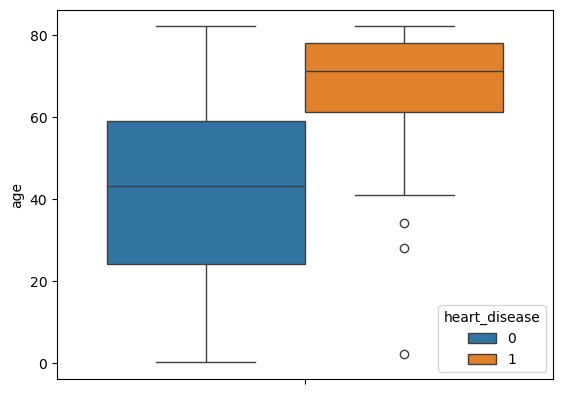

In [43]:
# Crete Box Plot of Age
""" Plot Box Plot for heart_disease and add hue """
sns.boxplot(data=df2, y='age',hue='heart_disease')


* People with heart disease are also of older age with median about 70.

<Axes: xlabel='age', ylabel='bmi'>

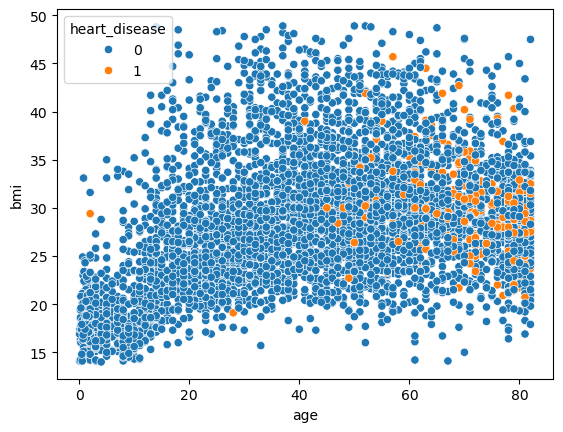

In [134]:
""" Plot SCATTER PLOT for heart_disease and add hue """
sns.scatterplot(data=df2,y='bmi',x='age',hue='heart_disease') #plots scatterplot with age as x-axis, BMI as y-axis, heart disease as hue

* Most of the people with heart disease are above the age of 60.
* BMI above 25 is over-weight category.
* Most of the people with heart disease lie above the over weight category.

Text(0.5, 1.0, 'Scatterplot for Age and Average Glucose level')

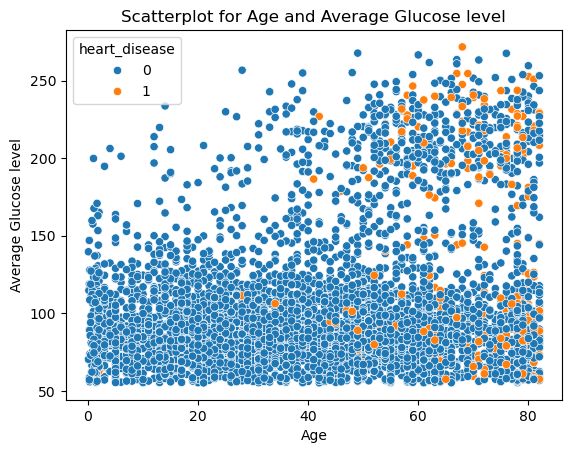

In [136]:
sns.scatterplot(data=df2,y='avg_glucose_level',x='age',hue='heart_disease')
plt.ylabel('Average Glucose level')
plt.xlabel('Age')
plt.title('Scatterplot for Age and Average Glucose level')

Text(0.5, 1.0, 'Scatterplot for Age and Average Glucose level')

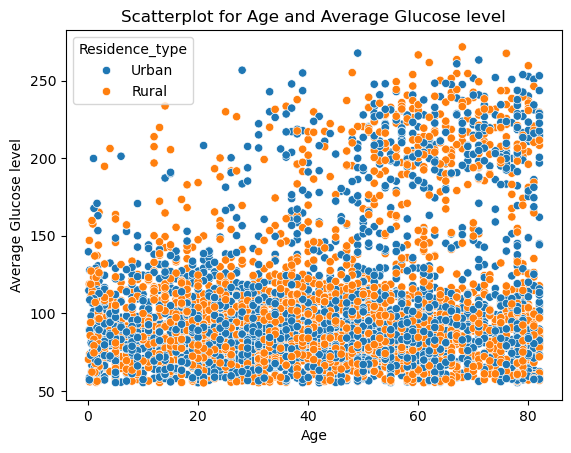

In [137]:
sns.scatterplot(data=df2,y='avg_glucose_level',x='age',hue='Residence_type')
plt.ylabel('Average Glucose level')
plt.xlabel('Age')
plt.title('Scatterplot for Age and Average Glucose level')

Text(0.5, 1.0, 'Scatterplot for Body Mass Index and Age')

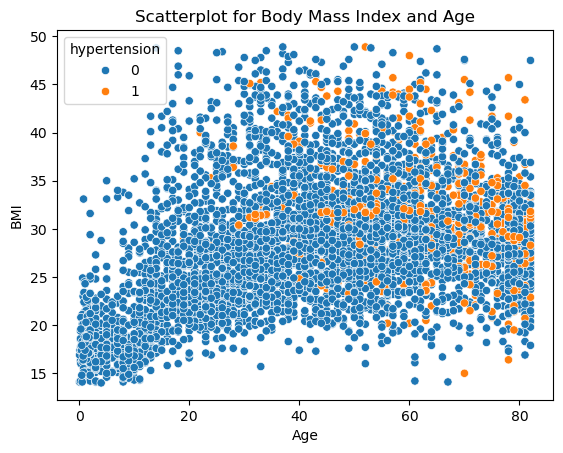

In [138]:
sns.scatterplot(data=df2,y='bmi',x='age',hue='hypertension')
plt.ylabel('BMI')
plt.xlabel('Age')
plt.title('Scatterplot for Body Mass Index and Age')

* Most people with hypertension lie above BMI of above 30 which is obese category.
* Above 40 BMI, it is extremly obese category.
* So, people with hypertension are more obese than total sample.

Text(0.5, 1.0, 'Scatterplot for Age and BMI')

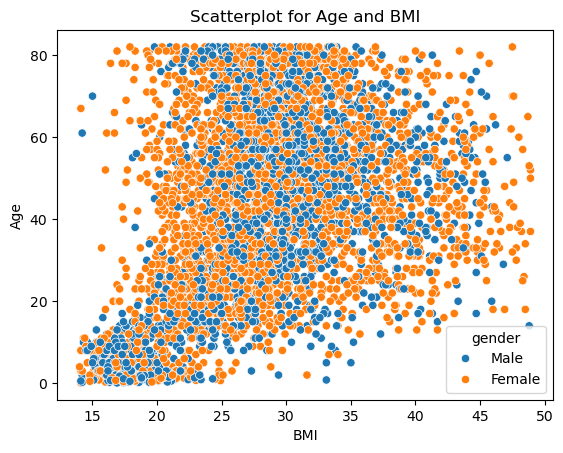

In [139]:
sns.scatterplot(data=df, x="bmi", y="age",hue="gender")
plt.ylabel('Age')
plt.xlabel('BMI')
plt.title('Scatterplot for Age and BMI')

* In extremely obese category which is above bmi 40, females are more than males.

Text(0.5, 1.0, 'Scatter plot of people who had stroke')

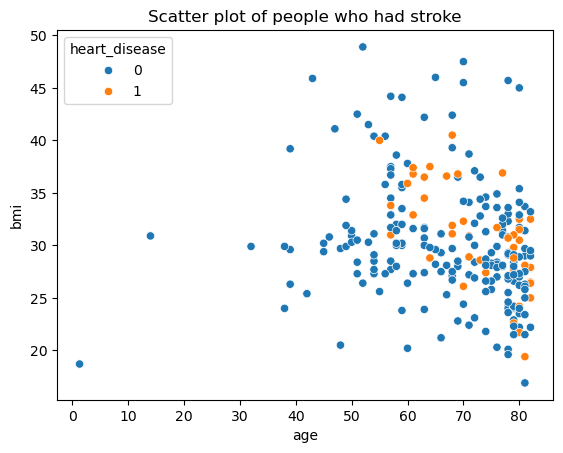

In [63]:
sns.scatterplot(data=df_stroke,y='bmi',x='age',hue='heart_disease')
plt.title('Scatter plot for people who had stroke')

* Most of the people with both stroke and heart disease have BMI above 30 which implies they are mostly obese people.

<Axes: xlabel='smoking_status', ylabel='Count'>

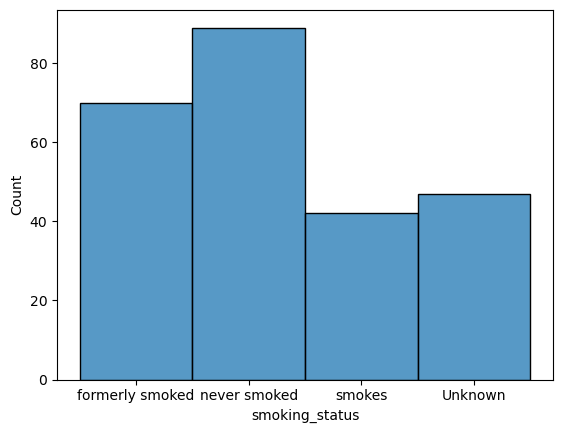

In [73]:
sns.histplot(data=df_stroke,x='smoking_status')

<Axes: xlabel='Residence_type', ylabel='Count'>

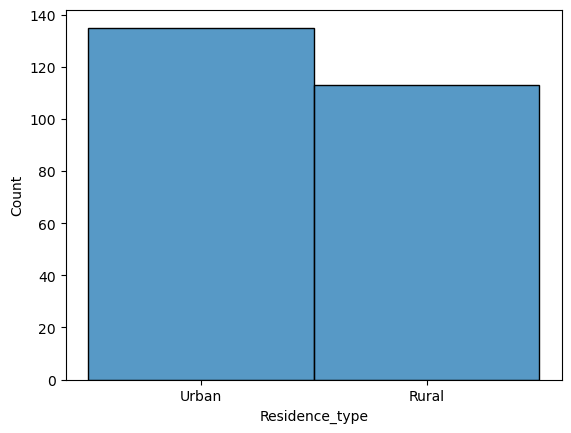

In [77]:
sns.histplot(data=df_stroke,x='Residence_type')

<Axes: xlabel='age', ylabel='bmi'>

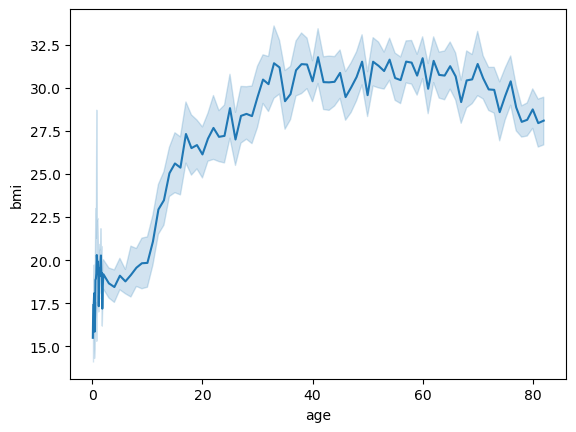

In [143]:
# line plot

sns.lineplot(data=df2, x='age',y='bmi')   #plots lineplot with estimate of central tendency and a confidence interval for that estimate



<Axes: xlabel='age', ylabel='bmi'>

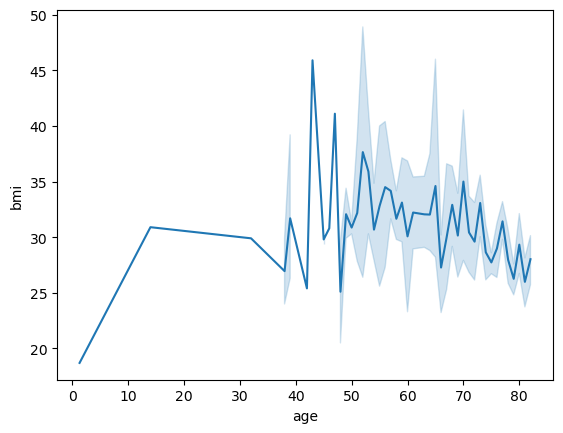

In [118]:
sns.lineplot(data=df_stroke,x='age',y='bmi')

<Axes: xlabel='age', ylabel='avg_glucose_level'>

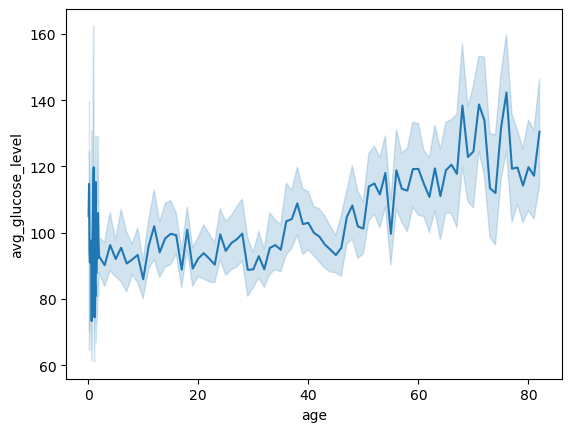

In [117]:
sns.lineplot(data=df2,x='age',y='avg_glucose_level')

<Axes: xlabel='age', ylabel='avg_glucose_level'>

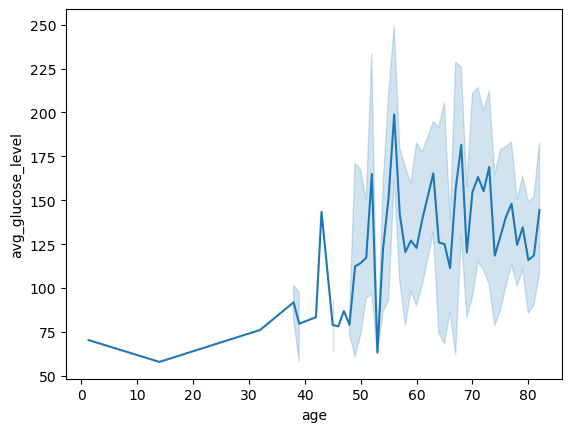

In [119]:
sns.lineplot(data=df_stroke,x='age',y='avg_glucose_level')

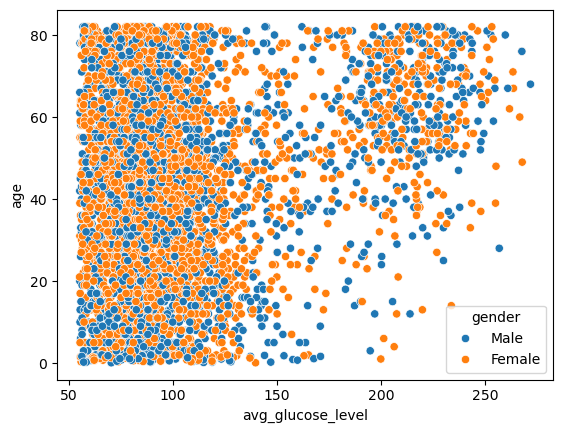

In [79]:
sns.scatterplot(data=df, x="avg_glucose_level", y="age",hue="gender")

# Write a code to save the image
plt.savefig('Scatter_plot_betn_age_and_glucose.png')


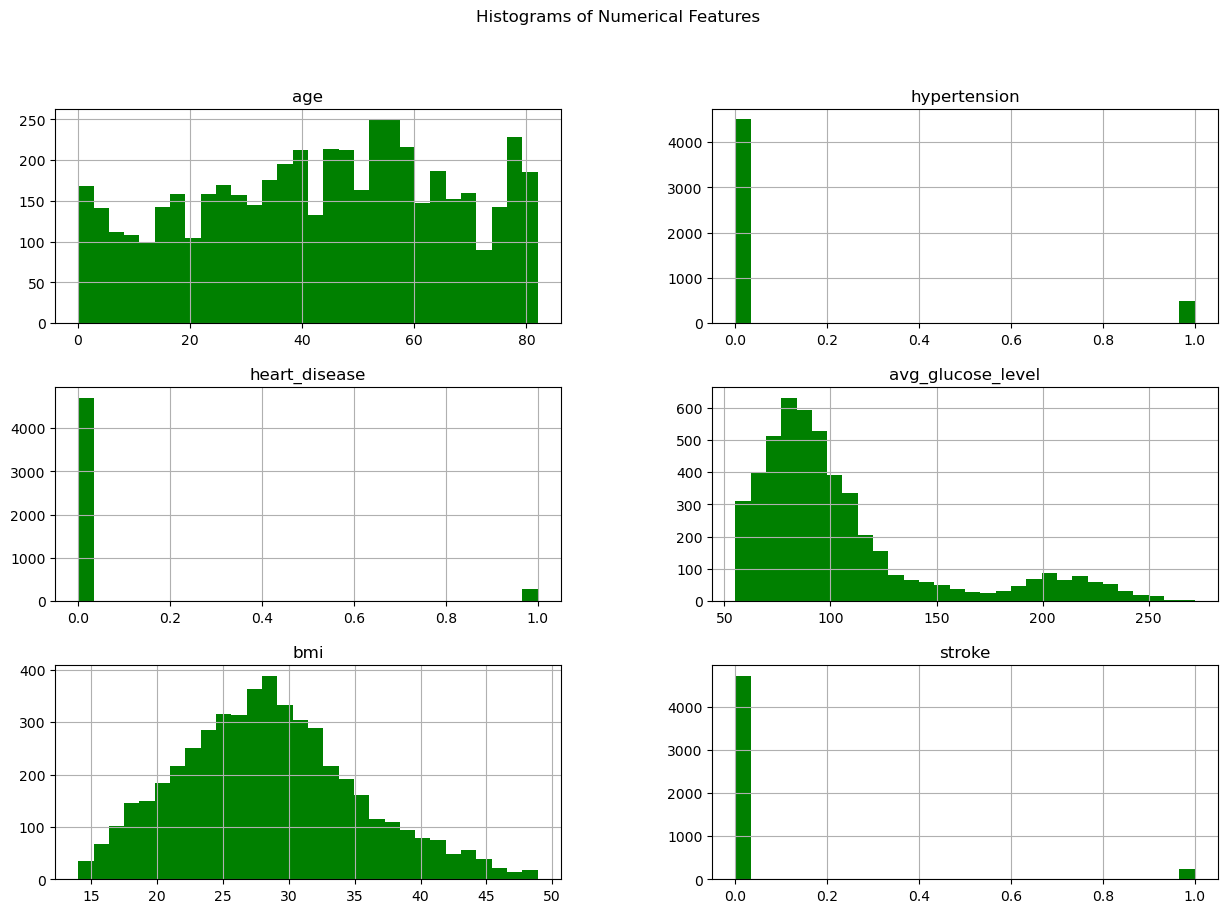

In [81]:
# Un comment this to see histogram of all varibale

# Histograms for numerical features
df.hist(bins=30, figsize=(15, 10), color='green')
plt.suptitle('Histograms of Numerical Features')
plt.show()


<Axes: ylabel='age'>

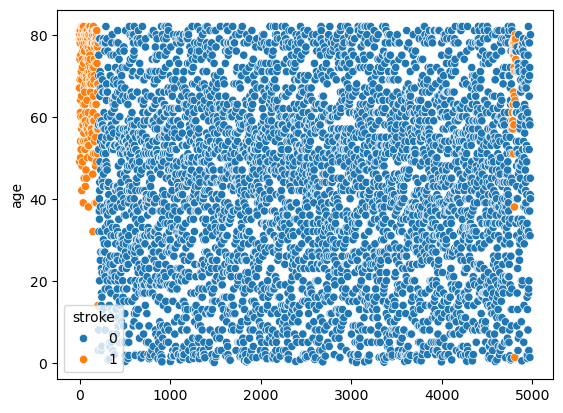

In [95]:
# Draw Scatterplot of stroke and age
sns.scatterplot(data=df2,y='age',x=range(0,4981),hue='stroke')


In [97]:
df_stroke.size

2728

<Axes: ylabel='age'>

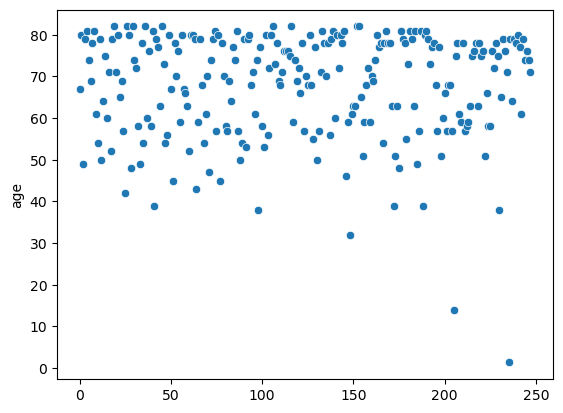

In [100]:
sns.scatterplot(data=df_stroke,y='age',x=range(0,248))

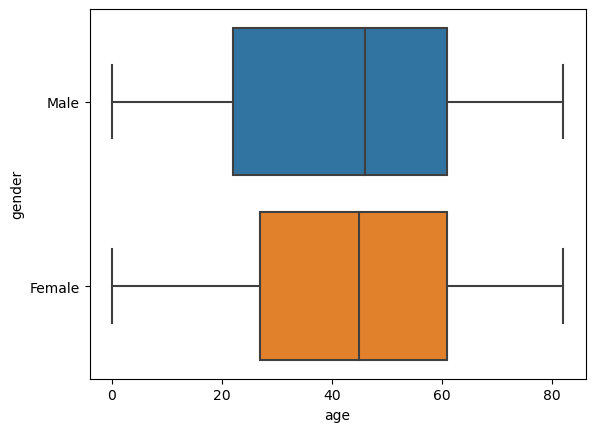

In [ ]:
# Build box plot of age and gender
# use this https://seaborn.pydata.org/generated/seaborn.boxplot.html

sns.boxplot(data=df, x="age", y="gender")
plt.savefig("malaaaa.png", dpi=300)

# Task: Create a Correlation Heatmap
Instructions:

* Import the required libraries: seaborn and matplotlib.pyplot.

* Use .corr() on your DataFrame to generate the correlation matrix.

* Create a figure using plt.figure() and set a suitable size (e.g., figsize=(10, 8)).

* Use sns.heatmap() to plot the correlation matrix.

* Set annot=True to show the correlation values.

* Choose a colormap using the cmap parameter (e.g., 'coolwarm', 'YlGnBu').

* Add a title using plt.title().

* Display the plot using plt.show().



Optional:

* Try different colormaps.

* Focus on identifying which features are most positively or negatively correlated with the target variable.

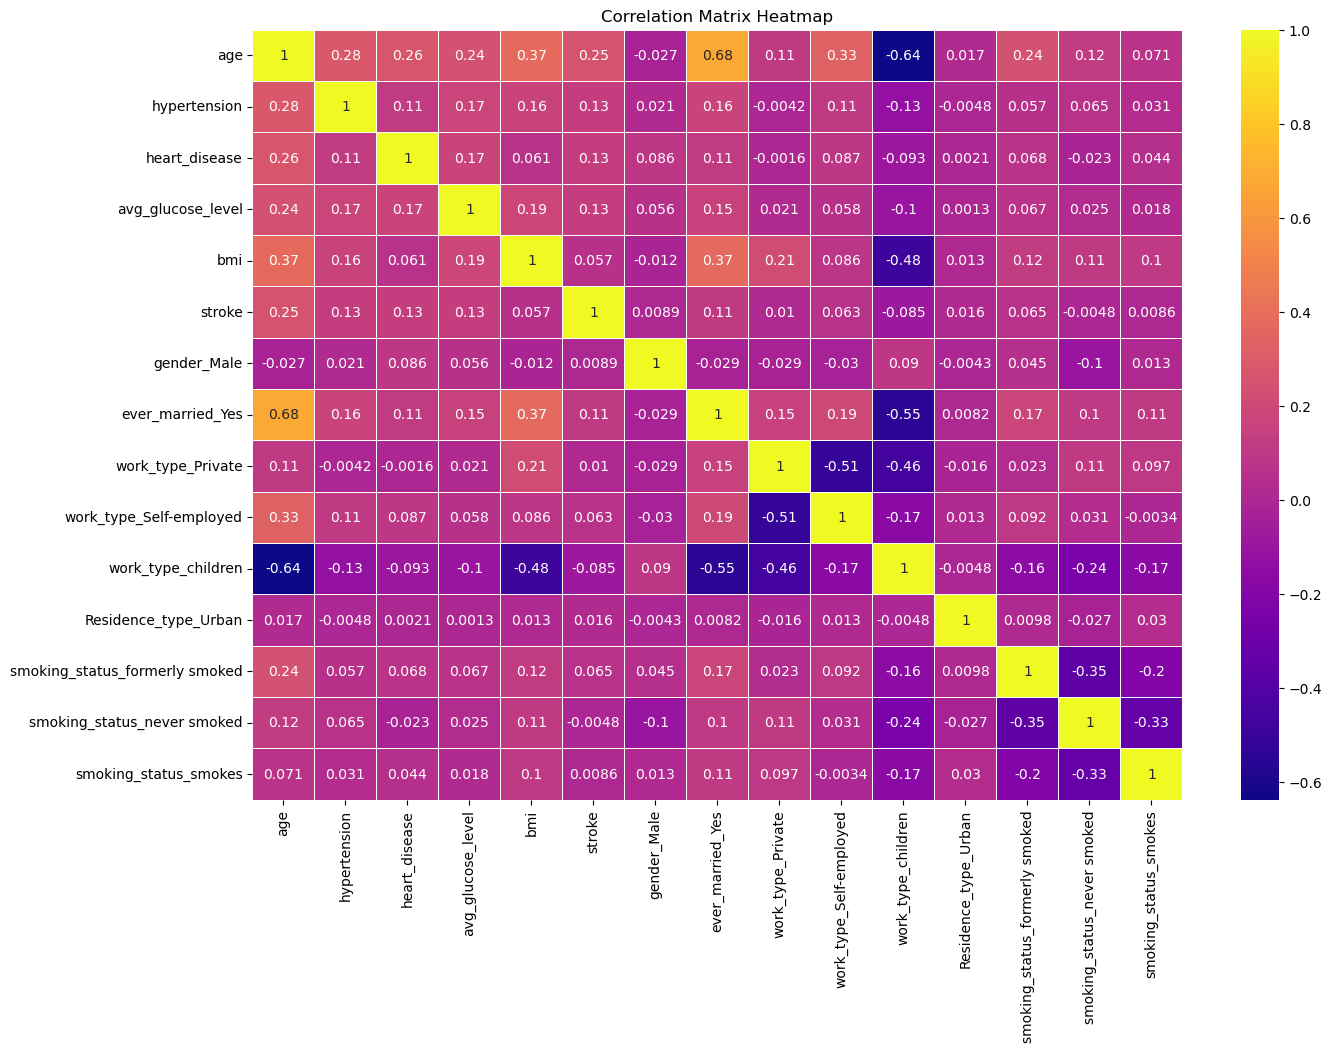

In [150]:
# Write your code here
data_encoded = pd.get_dummies(df, drop_first=True)   #converts categorical variable into indicator values, drop_first=True separates each category of categorical variable
correlation_matrix = data_encoded.corr()             #calculates correlations between each categories    

# Heatmap of correlation matrix
plt.figure(figsize=(15, 10))                         #plots correlation heatmap with size of width 15 and height 10
sns.heatmap(correlation_matrix, annot=True, cmap='plasma', linewidths=0.5)   #plots the data in correlation_matrix in color-encoded matrix
plt.title('Correlation Matrix Heatmap')   
plt.show()





### ✅ Final Step: Write a Bullet-Point Summary of Your Findings

After completing your analysis and heatmap, write a **clear and structured summary** of your observations. Include the following points:

- 📌 **Nature of the Data**  
  - Total number of rows and columns  
  - Identify types of features: numerical vs categorical  

- 🧾 **Steps Taken to Prepare Data**  
  - Mention which categorical columns were encoded  
  - Specify the encoding method used (e.g., label encoding, one-hot encoding) and the reason behind it  

- 🔢 **Correlated Variables**  
  - Highlight the most strongly **positively** and **negatively** correlated variable pairs  
  - Include any multicollinearity issues, if noticed  

- 🎯 **Target Variable Insight** *(if applicable)*  
  - Which features are most strongly correlated with the target variable (e.g., stroke, heart disease, etc.)  
  - Possible interpretation of those correlations  

- 📉 **Unexpected or Weak Correlations**  
  - Mention any features you expected to correlate but didn't  
  - Explain any surprising or unclear relationships  

- 💡 **Insights or Hypotheses**  
  - Summarize your overall learnings from the correlation matrix  
  - Suggest potential causes or real-world reasoning behind key patterns  


### Summary
* The Brain stroke data consisted 11 columns and 4981 rows wit total datapoints 54791.
* Five categorical attributes were Gender, Maritial Status, Work type, Residence type and Smoking Status. Six Numerical attributes were age, hypertension, heart disease, average glucose level and stroke.
* There were no null data.

* The most positive correlation observed was betweeen Age and maritial status of married with with coefficient of 0.68.
* Positive correlation between BMI and age was also observed with coefficient 0.37. Similarly, in between stroke incident and age there was 0.25. Heart disease and hypertension also positively correlated with age.
* I expected very high positive correlation between stroke and hypertension but only 0.13 was observed.
  

In [ ]:
# t-test